# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df = kill.copy()

## 1: Plot number of people by gender

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
gender_Data = df["gender"].value_counts()
gender_Data

M    2428
F     107
Name: gender, dtype: int64

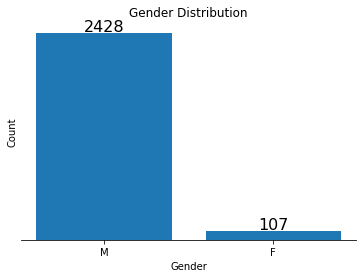

In [7]:
# with matplotlib

plt.bar(gender_Data.index,gender_Data);

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")


for i, g in enumerate(gender_Data):
    plt.text(i, g+15, f'{g}', ha='center', fontsize=16)

plt.yticks([])    
sns.despine(left=True)    

## 2: Plot 7 most common kill weapons

In [8]:
armed_Data = df["armed"].value_counts()[:7]
armed_Data

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

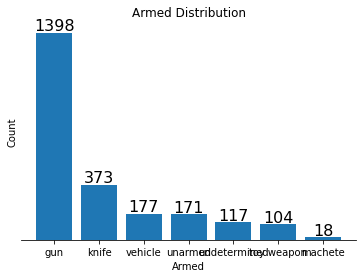

In [9]:
# with matplotlib

plt.bar(armed_Data.index,armed_Data);

plt.xlabel("Armed")
plt.ylabel("Count")
plt.title("Armed Distribution")


for i, g in enumerate(armed_Data):
    plt.text(i, g+15, f'{g}', ha='center', fontsize=16)

plt.yticks([])    
sns.despine(left=True)   

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [10]:
df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [12]:
df[df['age'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


In [13]:
conditions = [(df['age'] <= 25),(df['age'] > 25)]
values = ["below25","above25"]

In [14]:
df["above_25_select"] = np.select(conditions, values)

In [15]:
df["above_25_trans"] = df["age"].transform(lambda x: 'above25' if x > 25 else 'below25' )

In [16]:
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,above_25_select,above_25_trans
758,898,Gary Carmona Boitano,09/10/15,shot,knife,19.0,M,B,Columbia,MD,False,other,Not fleeing,False,below25,below25
1167,1336,Herbert Ballance,05/03/16,shot,gun,22.0,M,W,Beaumont,TX,True,other,Not fleeing,False,below25,below25
1043,1194,Randy Joe Sanders,20/01/16,shot,gun,33.0,M,W,Meridianville,AL,False,other,Foot,True,above25,above25
1684,1889,Jesse Beshaw,16/09/16,shot,unarmed,29.0,M,N,Winooski,VT,False,undetermined,Foot,True,above25,above25
845,994,Leonel Acevedo,09/11/15,shot,gun,45.0,M,H,San Jose,CA,False,attack,Not fleeing,False,above25,above25


In [17]:
above_25_select = df["above_25_select"].value_counts()
above_25_select

above25    1905
below25     553
0            77
Name: above_25_select, dtype: int64

In [18]:
above_25_trans = df["above_25_trans"].value_counts()
above_25_trans

above25    1905
below25     630
Name: above_25_trans, dtype: int64

In [20]:
above_25_select [:-1]

above25    1905
below25     553
Name: above_25_select, dtype: int64

In [21]:
above_25_select = above_25_select [:-1]

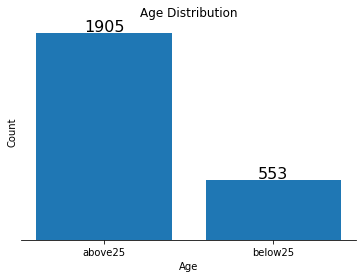

In [23]:
# with matplotlib


plt.bar(above_25_select.index,above_25_select);


plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")


for i, g in enumerate(above_25_select):
    plt.text(i, g+15, f'{g}', ha='center', fontsize=16)

plt.yticks([])    
sns.despine(left=True)   

## 4: Plot number of killed poeple by race

In [24]:
race_Data = df["race"].value_counts()
race_Data

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

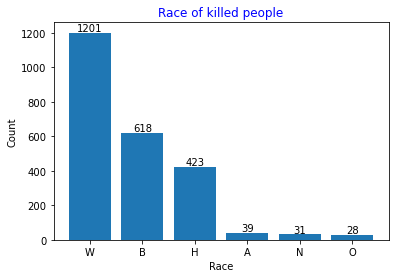

In [25]:

plt.bar(race_Data.index,race_Data);

plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Race of killed people",color="b")


for i, g in enumerate(race_Data):
    plt.text(i, g+10, f'{g}', ha='center', fontsize=10)

## 5: Killed People According to Races (Pie Chart)

In [26]:
df["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [27]:
df[df['race'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,above_25_select,above_25_trans
59,110,William Campbell,25/01/15,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False,above25,above25
241,244,John Marcell Allen,30/03/15,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False,above25,above25
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False,above25,above25
340,433,Joseph Roy,07/05/15,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False,above25,above25
398,503,James Anthony Morris,31/05/15,shot,gun,40.0,M,NaN,Medford,OR,True,attack,Not fleeing,False,above25,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,2811,Matthew Folden,27/07/17,shot,knife,31.0,M,NaN,Wenatchee,WA,False,other,Not fleeing,False,above25,above25
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.0,M,NaN,Glenville,NY,True,other,Not fleeing,False,above25,above25
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,above25,above25
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,0,below25


Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [28]:
race_Data = df["race"].value_counts()
race_Data

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [29]:
race_Data.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [30]:
race_Data.values

array([1201,  618,  423,   39,   31,   28], dtype=int64)

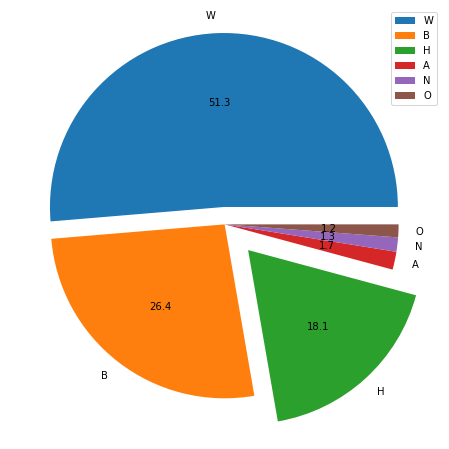

In [31]:
# matplotlib

plt.figure(figsize=(10, 8))

myexplode = [0.1, 0, 0.2, 0, 0, 0]

plt.pie(race_Data.values, labels=race_Data.index,explode=myexplode, autopct="%.1f")


plt.legend()
plt.show()